## This not a linear Regression but because of its equation similar to simple linear regression 

## Import Libraries

In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset 

In [95]:
# to read csv 
dataset = pd.read_csv('medical insurance dataset.csv')

In [96]:
dataset 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Split Input and Output Columns

In [97]:
# Result of X is 2D Array  # here we consider only one feature 
X = dataset.iloc[:,0:1].values

# result of y is 1D Array
y = dataset.iloc[:,-1].values

In [98]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [99]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Split Dataset into Train and Test

In [135]:
# after missing value handling we to avoid data leakage problem we perform first split operation 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)

In [136]:
len(X_train)

1070

In [137]:
len(y_train)

1070

## Add Model For Training

In [138]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_x_train = poly.fit_transform(X_train)


In [139]:
poly_x_train

array([[1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 3.300e+01, 1.089e+03],
       [1.000e+00, 5.700e+01, 3.249e+03],
       ...,
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 4.700e+01, 2.209e+03],
       [1.000e+00, 6.200e+01, 3.844e+03]])

In [140]:
X_test  # need to increase degree till 2 

array([[55],
       [35],
       [45],
       [27],
       [64],
       [18],
       [32],
       [52],
       [50],
       [32],
       [18],
       [43],
       [64],
       [21],
       [57],
       [52],
       [55],
       [20],
       [32],
       [28],
       [56],
       [51],
       [21],
       [18],
       [18],
       [20],
       [29],
       [38],
       [21],
       [27],
       [35],
       [18],
       [22],
       [23],
       [22],
       [19],
       [62],
       [49],
       [43],
       [19],
       [18],
       [52],
       [24],
       [49],
       [34],
       [37],
       [52],
       [50],
       [42],
       [19],
       [42],
       [43],
       [30],
       [29],
       [28],
       [45],
       [38],
       [45],
       [31],
       [29],
       [56],
       [30],
       [28],
       [35],
       [26],
       [30],
       [31],
       [19],
       [48],
       [45],
       [32],
       [48],
       [18],
       [28],
       [26],
       [56],
       [19],

In [141]:
poly_x_test = poly.transform(X_test) # here we use same intercept and coefficient of poly_X_train

In [142]:
poly_x_test

array([[1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 6.400e+01, 4.096e+03],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 5.200e+01, 2.704e+03],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 4.300e+01, 1.849e+03],
       [1.000e+00, 6.400e+01, 4.096e+03],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 5.700e+01, 3.249e+03],
       [1.000e+00, 5.200e+01, 2.704e+03],
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 5.600e+01, 3.136e+03],
       [1.000e+00, 5.100e+01, 2.601e+03],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 1.800e+01, 3.24

In [143]:
from sklearn.linear_model import LinearRegression
poly_lr =  LinearRegression()
poly_lr.fit(poly_x_train,y_train)

LinearRegression()

In [144]:
pred_poly_x_test = poly_lr.predict(poly_x_test)

In [145]:
pred_poly_x_train = poly_lr.predict(poly_x_train)

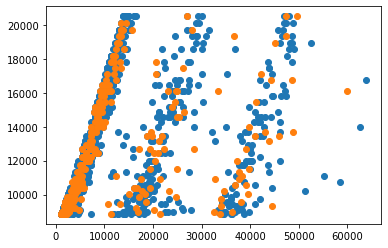

In [146]:
plt.scatter(y_train,pred_poly_x_train)
plt.scatter(y_test,pred_poly_x_test)
# plt.scatter(y_test,y_yest_pred,alpha=0.5,color='red')

In [147]:
from sklearn.metrics import r2_score

In [148]:
acc = r2_score(y_test,pred_poly_x_test)

In [149]:
acc = r2_score(y_train,pred_poly_x_train)

In [150]:
acc

0.08573349992438706

## To Check Which one performs better Linear Regression Or Poly Linear Regression 

In [151]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [159]:
pred_x_train = lr.predict(X_train)

In [160]:
pred_x_test = lr.predict(X_test)

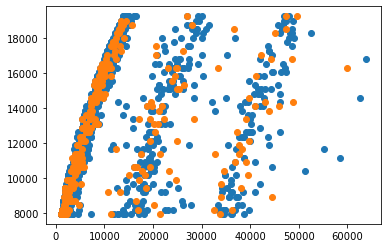

In [161]:
plt.scatter(y_train,lr.predict(X_train))
plt.scatter(y_test,lr.predict(X_test))

In [162]:
len(y_test)

268

In [163]:
len(pred_x_test)

268

In [165]:
#simple LR
from sklearn.metrics import r2_score
score = r2_score(y_test,pred_x_test)

0.10959394786346732

In [166]:
score = r2_score(y_train,pred_x_train)

In [167]:
score

0.08344542504032215